# SETUP
---

## import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob

from fastparquet import ParquetFile

# visualization packages
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import squarify
from pygal import Treemap as tm
from pygal.style import Style as pgstyle

from jupyterthemes import jtplot
jtplot.style()

## load data

### load store info data

In [3]:
# read parquet file
filelist = glob.glob('instacart_store_info.parquet/*.parquet')
pf = ParquetFile(filelist)

# convert parquet file to dataframe
df_store = pf.to_pandas()
df_store.head()

,product_id,product_name,aisle_id,aisle,department_id,department
0,1,Chocolate Sandwich Cookies,61,cookies cakes,19,snacks
1,2,All-Seasons Salt,104,spices seasonings,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,tea,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,frozen meals,1,frozen
4,5,Green Chile Anytime Sauce,5,marinades meat preparation,13,pantry


### load order info data

In [4]:
# read parquet file
filelist = glob.glob('instacart_order_info.parquet/*.parquet')
pf = ParquetFile(filelist)

# convert parquet file to dataframe
df_orders = pf.to_pandas()
df_orders.head()

,order_id,product_id,product_name,department_id,department,add_to_cart_order,reordered
0,2,33120,Organic Egg Whites,16.0,dairy eggs,1,1
1,2,28985,Michigan Organic Kale,4.0,produce,2,1
2,2,9327,Garlic Powder,13.0,pantry,3,0
3,2,45918,Coconut Butter,13.0,pantry,4,1
4,2,30035,Natural Sweetener,13.0,pantry,5,0


### load order info pivoted data

In [5]:
# read parquet file
filelist = glob.glob('instacart_order_pivot.parquet/*.parquet')
pf = ParquetFile(filelist)

# convert parquet file to dataframe
df_orders_pvt = pf.to_pandas()
df_orders_pvt = df_orders_pvt.sort_values(by=['user_id','order_number'])
df_orders_pvt.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour,d1,d2,d3,d4,...,d15,d16,d17,d18,d19,d20,d21,days_elapsed,reord1,num_items
3346718,2266710,206209,prior,10,5,18,1,0,1,1,...,0,1,1,0,1,0,0,29.0,3,9
1753600,1854736,206209,prior,11,4,10,0,0,1,1,...,0,2,1,0,1,1,0,30.0,6,8
2224894,626363,206209,prior,12,1,12,0,0,2,5,...,0,4,3,0,1,1,0,18.0,14,20
1451777,2977660,206209,prior,13,1,12,0,0,0,1,...,0,2,0,0,4,0,0,7.0,4,9
549395,272231,206209,train,14,6,14,1,0,1,1,...,0,1,1,0,1,0,0,30.0,4,8


# Visualize Data
---

## store statistics

### departments

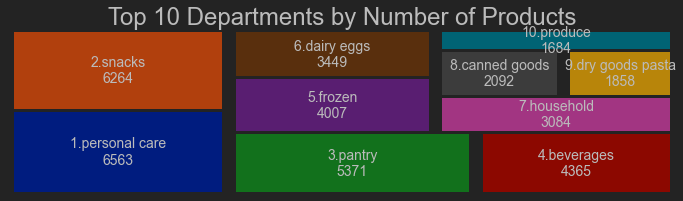

In [6]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['font.size'] = 14

# define data to plot
my_data = df_store.department.value_counts().reset_index()
my_data.columns = ['dept', 'prod_count']
my_data['ranking'] = my_data.index + 1
my_data['label'] = my_data.ranking.astype(str) + '.' + my_data.dept + '\n' + my_data.prod_count.astype(str)
my_data = my_data.head(10)

# plot treemap
square_colors = sns.color_palette('dark',21)
squarify.plot(sizes=my_data.prod_count, label=my_data.label, color=square_colors, alpha=1.0, pad=True)

# plot labeling options
plt.title('Top 10 Departments by Number of Products', fontsize=24)
plt.axis('off')

plt.show()

### aisles

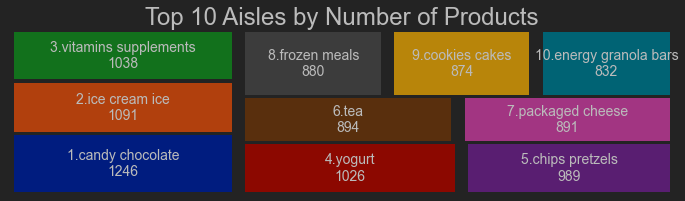

In [7]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['font.size'] = 14

# define data to plot
my_data = df_store.aisle.value_counts().reset_index().iloc[1:, :]
my_data.columns = ['aisle', 'prod_count']
my_data['ranking'] = my_data.index
my_data['label'] = my_data.ranking.astype(str) + '.' + my_data.aisle + '\n' + my_data.prod_count.astype(str)
my_data = my_data.head(10)

# plot treemap
square_colors = sns.color_palette('dark',21)
squarify.plot(sizes=my_data.prod_count, label=my_data.label, color=square_colors, alpha=1.0, pad=True)

# plot labeling options
plt.title('Top 10 Aisles by Number of Products', fontsize=24)
plt.axis('off')

plt.show()

## order statistics

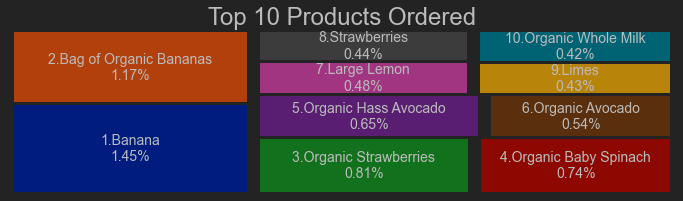

In [8]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['font.size'] = 14

# define data to plot
my_data = df_orders.product_name.value_counts(normalize=True).reset_index()
my_data.columns = ['product_name', 'order_count']
my_data.order_count = my_data.order_count * 100
my_data.order_count = my_data.order_count.round(2)
my_data['ranking'] = my_data.index + 1
my_data['label'] = my_data.ranking.astype(str) + '.' + my_data.product_name + '\n' + my_data.order_count.astype(str) + '%'
my_data = my_data.head(10)

# plot treemap
square_colors = sns.color_palette('dark',21)
squarify.plot(sizes=my_data.order_count, label=my_data.label, color=square_colors, alpha=1.0, pad=True)

# plot labeling options
plt.title('Top 10 Products Ordered', fontsize=24)
plt.axis('off')
plt.show()


In [9]:
df_orders[df_orders.department=='produce'].product_name.value_counts().reset_index().iloc[0]['index']

'Banana'

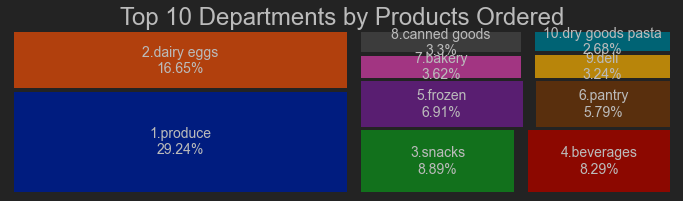

In [10]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['font.size'] = 14

# define data to plot
my_data = df_orders.department.value_counts(normalize=True).reset_index()
my_data.columns = ['department', 'order_count']
my_data.order_count = my_data.order_count * 100
my_data.order_count = my_data.order_count.round(2)
my_data['ranking'] = my_data.index + 1


def top_products_per_dept(x):
    #return ', '.join(list(df_orders[df_orders.department==x].product_name.value_counts().reset_index().iloc[:3]['index'].values))
    return df_orders[df_orders.department==x].product_name.value_counts().reset_index().iloc[0]['index']

#my_data['top_products'] = my_data.department.apply(top_products_per_dept)

my_data['label'] = my_data.ranking.astype(str) + '.' + my_data.department + '\n' + my_data.order_count.astype(str) + '%'# + '\n' + my_data.top_products
my_data = my_data.head(10)

# plot treemap
square_colors = sns.color_palette('dark',21)
squarify.plot(sizes=my_data.order_count, label=my_data.label, color=square_colors, alpha=1.0, pad=True)

# plot labeling options
plt.title('Top 10 Departments by Products Ordered', fontsize=24)
plt.axis('off')
plt.show()


## order pivot Statistics

In [11]:
df_orders_pvt.describe()

,order_id,user_id,order_number,order_dow,order_hour,d1,d2,d3,d4,d5,...,d15,d16,d17,d18,d19,d20,d21,days_elapsed,reord1,num_items
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,...,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06
mean,1.673061e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,6.830755e-01,1.113273e-02,3.581267e-01,2.890423e+00,4.656245e-02,...,3.258784e-01,1.645990e+00,2.264339e-01,1.282468e-01,8.787896e-01,3.202319e-01,2.262325e-02,1.046162e+01,5.833053e+00,9.885496e+00
std,1.008298e+06,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,1.246488e+00,1.088338e-01,6.876537e-01,3.183835e+00,3.710464e-01,...,7.851945e-01,1.892800e+00,6.958604e-01,7.754567e-01,1.529503e+00,6.760810e-01,1.749753e-01,9.296047e+00,5.847892e+00,7.604601e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.977525e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00
50%,1.672230e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,4.000000e+00,8.000000e+00
75%,2.546710e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,8.000000e+00,1.300000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.300000e+01,6.000000e+00,1.400000e+01,5.100000e+01,4.000000e+01,...,2.300000e+01,4.800000e+01,4.800000e+01,6.000000e+01,7.600000e+01,1.600000e+01,9.000000e+00,3.000000e+01,1.300000e+02,1.450000e+02


## number of items ordered

### drop outliers

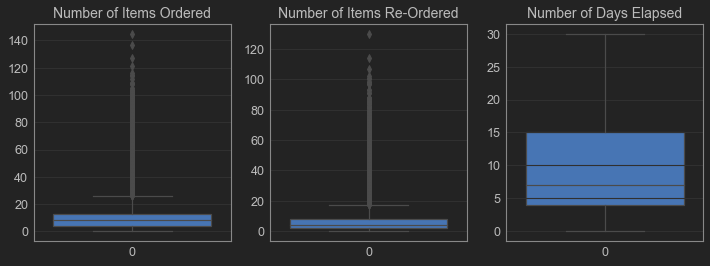

In [12]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot boxplots

plt.subplot(1,3,1)
sns.boxplot(data=df_orders_pvt.num_items)
plt.title('Number of Items Ordered', fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(data=df_orders_pvt.reord1)
plt.title('Number of Items Re-Ordered', fontsize=14)

plt.subplot(1,3,3)
sns.boxplot(data=df_orders_pvt.days_elapsed)
plt.title('Number of Days Elapsed', fontsize=14)


plt.show()

In [13]:
# get 25% and 75% quantile values
q25, q75 = np.percentile(df_orders_pvt.num_items, [25,75])

# get iqr value
iqr = q75-q25

# define iqr limits
maxlim = q75 + 1.5*iqr
minlim = q25 - 1.5*iqr

print(maxlim,minlim)

26.5 -9.5


In [14]:
# drop num_items outliers
outliers = df_orders_pvt[df_orders_pvt.num_items > maxlim].index.to_list()
df_orders_pvt.drop(outliers, inplace=True)
len(df_orders_pvt)

3292455

### Orders by Day of Week

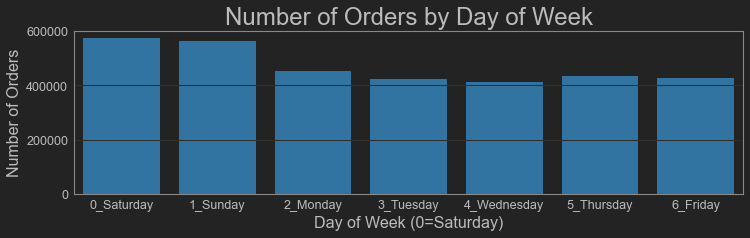

In [15]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,3)

def apply_day(x):
    days = ['0_Saturday','1_Sunday','2_Monday','3_Tuesday','4_Wednesday','5_Thursday','6_Friday']
    return days[x]

# set up data
my_data = df_orders_pvt.copy()
my_data['order_day'] = my_data.order_dow.apply(apply_day)
my_data = my_data.sort_values(by=['order_day'])

# plot countplot
sns.countplot(data=my_data, x='order_day', color='tab:blue')#palette='husl')

# plot labeling options
plt.title('Number of Orders by Day of Week', fontsize=24)
plt.xlabel('Day of Week (0=Saturday)', fontsize=16)
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- The most popular days of the week to shop via Instacart are during the weekends.
- The least popular day is Wednesday, right in the middle of the workweek.

### Orders by Hour of Day

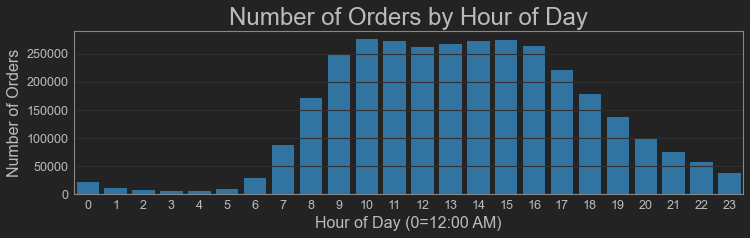

In [16]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,3)

# plot countplot
sns.countplot(data=df_orders_pvt, x='order_hour', color='tab:blue')#palette='husl')

# plot labeling options
plt.title('Number of Orders by Hour of Day', fontsize=24)
plt.xlabel('Hour of Day (0=12:00 AM)', fontsize=16)
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- The peak order times are between 10:00 AM and 04:00 PM.
- The dead times are between midnight and 06:00 AM.

### Orders by Days Elapsed SInce Previous Order

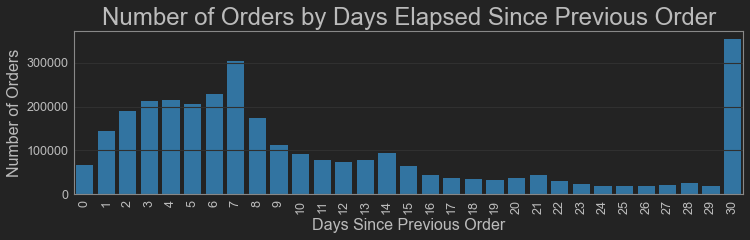

In [17]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,3)

# define data to plot
my_data = df_orders_pvt.copy()
my_data = my_data[my_data.order_number>1]
my_data.days_elapsed = my_data.days_elapsed.astype(int)

# plot countplot
sns.countplot(data=my_data, x='days_elapsed', color='tab:blue')

# plot labeling options
plt.title('Number of Orders by Days Elapsed Since Previous Order', fontsize=24)
plt.xlabel('Days Since Previous Order', fontsize=16)
plt.ylabel('Number of Orders', fontsize=16)
plt.xticks(rotation='vertical')

plt.show()

- There appears to be several several distributions of lag times:
 - 3-4 days
 - 7 days
 - 14 days
 - 21 days
 - 30 days

### Orders by Order Number

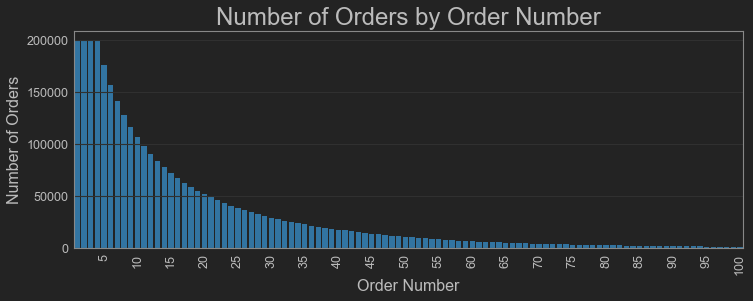

In [18]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# plot countplot
plot_ = sns.countplot(data=df_orders_pvt, x='order_number', color='tab:blue')

# adjust xtick labels
for index, label in enumerate(plot_.get_xticklabels()):
    if not (index+1) % 5:
        label.set_visible(True)
    else:
        label.set_visible(False)

# plot labeling options
plt.title('Number of Orders by Order Number', fontsize=24)
plt.xlabel('Order Number', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- Order Number denotes which order (1st, 2nd, 3rd, ..., etc) it is for the customer in the dataset.
- Users ordered between 4 and 100 times from Instacart in the dataset.
- After 4 orders, the number of orders decreases gradually.

In [19]:
df_tmp = pd.DataFrame(df_orders_pvt.groupby('order_number').aggregate('count').order_id).reset_index()
df_tmp.columns = ['order_number','order_count']
df_tmp['cum_sum'] = df_tmp.order_count.cumsum()
df_tmp['cum_perc'] = 100*df_tmp.cum_sum/df_tmp.order_count.sum()
pd.set_option('display.max_rows', 100)
df_tmp

,order_number,order_count,cum_sum,cum_perc
0,1,198681,198681,6.034433
1,2,198946,397627,12.076915
2,3,198985,596612,18.120582
3,4,198933,795545,24.162669
4,5,175700,971245,29.499112
5,6,156676,1127921,34.257750
6,7,141079,1269000,38.542668
7,8,127632,1396632,42.419167
8,9,116339,1512971,45.952671
9,10,106512,1619483,49.187703


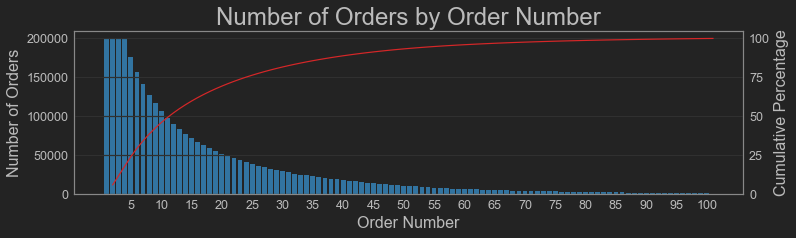

In [25]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,3)

# plot countplot
ax1 = sns.barplot(df_tmp.order_number, df_tmp.order_count, color='tab:blue')

# adjust xtick labels
for index, label in enumerate(ax1.get_xticklabels()):
    if not (index+1) % 5:
        label.set_visible(True)
    else:
        label.set_visible(False)

# plot labeling options
plt.xlabel('Order Number', fontsize=16)
plt.yticks(np.arange(0,250000, 50000))
plt.ylabel('Number of Orders', fontsize=16)

# plot second axis
ax2 = ax1.twinx()
sns.lineplot(df_tmp.order_number, df_tmp.cum_perc, ax=ax2, color='tab:red')

# plot labeling options
plt.title('Number of Orders by Order Number', fontsize=24)
plt.ylabel('Cumulative Percentage', fontsize=16)
plt.yticks(np.arange(0,125,25))

plt.show()

### Orders by Number of Items Ordered

In [22]:
# calculate number of orders per num_items value
pd.DataFrame(df_orders_pvt.groupby('num_items').aggregate('count').order_id.sort_values(ascending=False)).head()

,order_id
num_items,
5,237224
6,236383
4,230300
7,228548
3,215060


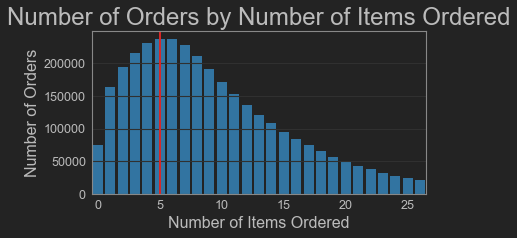

In [38]:
# set figure parameters
plt.rcParams['figure.figsize'] = (6,3)

# plot countplot
plot_ = sns.countplot(data=df_orders_pvt, x='num_items', color='tab:blue')

# adjust xtick labels
for index, label in enumerate(plot_.get_xticklabels()):
    if not (index) % 5:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.axvline(5, color='tab:red', linewidth=2.0, label='peak')       

# plot labeling options
plt.title('Number of Orders by Number of Items Ordered', fontsize=24)
plt.xlabel('Number of Items Ordered', fontsize=16)
#plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- The number of orders peaks at 5 items ordered.
- The distribution appears to be somewhat Gaussian in nature, centered at 5 items, though obviously there cannot be a negative number of items.

### Orders by Number of Items Re-Ordered

In [37]:
# calculate number of orders per num_items value
pd.DataFrame(df_orders_pvt.groupby('reord1').aggregate('count').order_id.sort_values(ascending=False)).head()

,order_id
reord1,
0,464179
2,344717
1,342809
3,324747
4,292491


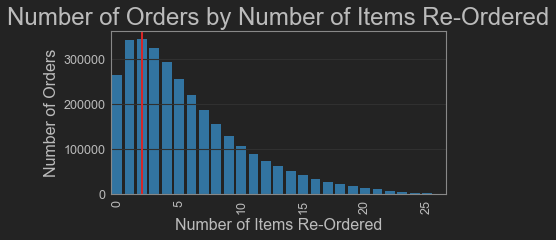

In [36]:
# set figure parameters
plt.rcParams['figure.figsize'] = (6,3)

# filter data to exclude 1st orders
my_data = df_orders_pvt[df_orders_pvt.order_number>1]

# plot countplot
plot_ = sns.countplot(data=my_data, x='reord1', color='tab:blue')

# adjust xtick labels
for index, label in enumerate(plot_.get_xticklabels()):
    if not (index) % 5:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.axvline(2, color='tab:red', linewidth=2.0, label='peak')    
        
# plot labeling options
plt.title('Number of Orders by Number of Items Re-Ordered', fontsize=24)
plt.xlabel('Number of Items Re-Ordered', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders', fontsize=16)

plt.show()

- The number of orders peaks at 2 items re-ordered, though 1 item re-ordered is close behind.
- Again, the distribution appears similar to a (one-sided) Gaussian.

In [29]:
df_orders_pvt.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour,d1,d2,d3,d4,...,d15,d16,d17,d18,d19,d20,d21,days_elapsed,reord1,num_items
2132290,2539329,1,prior,1,2,8,0,0,0,0,...,0,1,1,0,2,0,0,0.0,0,5
3193189,2398795,1,prior,2,3,7,0,0,0,1,...,0,0,0,0,3,0,0,15.0,3,6
345225,473747,1,prior,3,3,12,0,0,0,0,...,0,1,0,0,2,0,0,21.0,3,5
1396792,2254736,1,prior,4,4,7,0,0,0,0,...,0,1,1,0,2,0,0,29.0,5,5
2190008,431534,1,prior,5,4,15,0,0,0,4,...,0,1,0,0,2,0,0,28.0,5,8


### Number of Items Re-Ordered vs. Number of Total Items Ordered

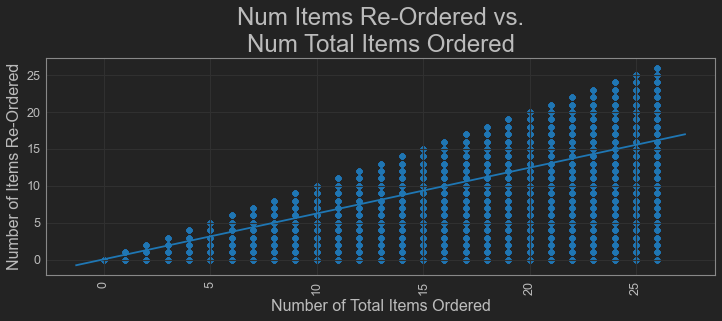

In [30]:
# set figure parameters
plt.rcParams['figure.figsize'] = (12,4)

# filter data to exclude 1st orders
# sample data (w/no replacement and random_state not set) to reduce compute time
my_data = df_orders_pvt[df_orders_pvt.order_number > 1].sample(frac=0.25)

# plot regplot
plot_ = sns.regplot(data=my_data, x='num_items', y='reord1', color='tab:blue')
      
# plot labeling options
plt.title('Num Items Re-Ordered vs.\nNum Total Items Ordered', fontsize=24)
plt.xlabel('Number of Total Items Ordered', fontsize=16)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Items Re-Ordered', fontsize=16)

plt.show()

### Correlations

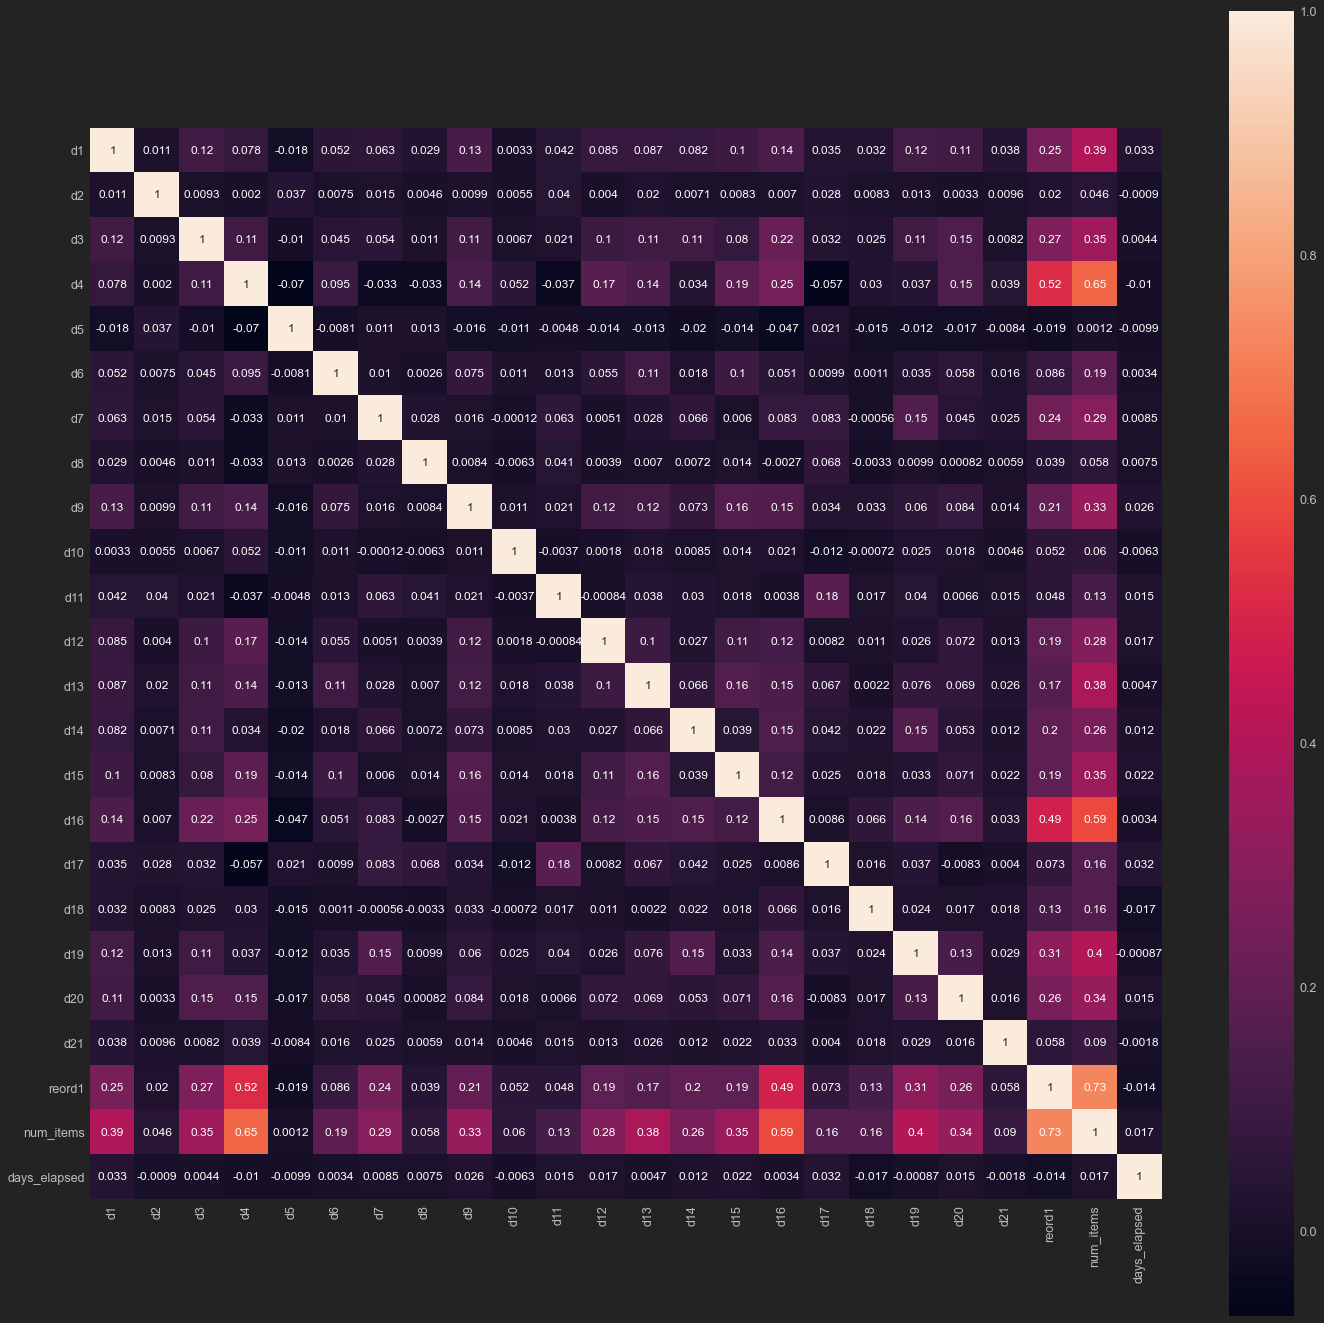

In [44]:
plt.rcParams['figure.figsize'] = (24,24)
plt.rcParams['font.size'] = 12
my_data = df_orders_pvt[df_orders_pvt.loc[:, 'd1':'d21'].columns.to_list() + ['reord1','num_items','days_elapsed']].sample(frac=0.25)
sns.heatmap(my_data.corr(), annot=True, square=True)
plt.show()

In [46]:
pd.DataFrame(my_data.corrwith(my_data.num_items), columns=['corr']).reset_index().sort_values(by=['corr'], ascending=False).head(10)

,index,corr
22,num_items,1.000000
21,reord1,0.731229
3,d4,0.653757
15,d16,0.593018
18,d19,0.401165
0,d1,0.390361
12,d13,0.381021
2,d3,0.353039
14,d15,0.346875
19,d20,0.335703


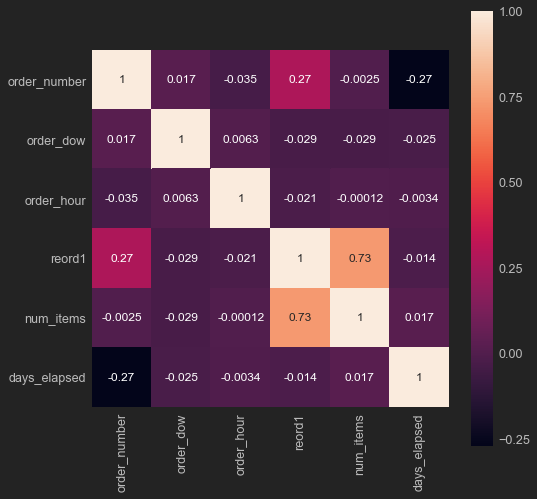

In [33]:
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.size'] = 12
my_data = df_orders_pvt[['order_number','order_dow','order_hour','reord1','num_items','days_elapsed']].sample(frac=0.25)
sns.heatmap(my_data.corr(), annot=True, square=True)
plt.show()

In [49]:
pd.DataFrame(my_data.corrwith(my_data.days_elapsed), columns=['corr']).reset_index().sort_values(by=['corr'], ascending=False).head(10)

,index,corr
23,days_elapsed,1.000000
0,d1,0.033226
16,d17,0.032168
8,d9,0.026241
14,d15,0.022098
11,d12,0.016751
22,num_items,0.016646
10,d11,0.015481
19,d20,0.015340
13,d14,0.011909


- d4 (produce) and d16 (dairy/eggs) correlate the best with num_items
- this is not surprising as these were the departments with the most number of items ordered
- no variable correlates well with the order lag time, days_elapsed

In [34]:
#df_orders_pvt.to_csv('instacart_order_pivot.csv',index=False)